In [106]:
# importing relevant packages

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from eofs.standard import Eof

In [49]:
# loading in the datasets 
msl_ds = xr.open_dataset("msl_monthly.nc")
sst_ds = xr.open_dataset("sst_monthly.nc")
v10_ds = xr.open_dataset("v10_monthly.nc")
u10_ds = xr.open_dataset("u10_monthly.nc")

In [ ]:
# turning datasets into numpy arrays - easier for manipulating 
msl = msl_ds.msl.to_numpy()
sst = sst_ds.sst.to_numpy()
v10 = v10_ds.v10.to_numpy()
u10 = u10_ds.u10.to_numpy()

In [87]:
# variables holding dimensions, coordinates and times of each dataset
msl_dims = msl_ds.dims
msl_coords = msl_ds.coords
msl_times = msl_ds.time

sst_dims = sst_ds.dims
sst_coords = sst_ds.coords
sst_times = sst_ds.time

v10_dims = v10_ds.dims
v10_coords = v10_ds.coords
v10_times = v10_ds.time

u10_dims = u10_ds.dims
u10_coords = u10_ds.coords
u10_times = u10_ds.time

### For looking at the region 30°S-30°N and 100°E-70°W, we need to index the latitude and longitude data

- 480 longitude data points evenly spaced between 0 and 360 degrees
- 241 latitude data points evenly spaced between -90 and 90 degrees


In [109]:
# Extract the variable of interest (e.g., 'temperature')
msl_data = msl_ds['msl']  # Replace 'temperature' with your variable name

# Reshape data if necessary (e.g., lat, lon, time -> (space, time))
msl_data_reshaped = msl_data.stack(space=('latitude', 'longitude'))  # Replace 'lat', 'lon' with your coordinates
msl_data_array = msl_data_reshaped.values  # Convert to a NumPy array

# Handle missing data (if necessary)
msl_data_masked = np.ma.masked_invalid(msl_data_array)

# Initialize the solver
msl_solver = Eof(msl_data_masked)

In [110]:
# Compute EOFs, PCs, and explained variance
eofs = msl_solver.eofs(neofs=5)  # First 5 EOFs
pcs = msl_solver.pcs(npcs=5, pcscaling=1)  # Principal components
variance = msl_solver.varianceFraction(neigs=5)  # Explained variance fraction

In [113]:
msl_solver.eofs(neofs=5)

masked_array(
  data=[[-0.0017944872379302979, -0.0017944872379302979,
         -0.0017944872379302979, -0.0017944872379302979,
         -0.0017944872379302979, -0.0017944872379302979,
         -0.0017944872379302979, -0.0017944872379302979,
         -0.0017944872379302979, -0.0017944872379302979,
         -0.0017944872379302979, -0.0017944872379302979,
         -0.0017944872379302979, -0.0017944872379302979,
         -0.0017944872379302979, -0.0017944872379302979,
         -0.0017944872379302979, -0.0017944872379302979,
         -0.0017944872379302979, -0.0017944872379302979,
         -0.0017944872379302979, -0.0017944872379302979,
         -0.0017944872379302979, -0.0017944872379302979,
         -0.0017944872379302979, -0.0017944872379302979,
         -0.0017944872379302979, -0.0017944872379302979,
         -0.0017944872379302979, -0.0017944872379302979,
         -0.0017944872379302979, -0.0017944872379302979,
         -0.0017944872379302979, -0.0017944872379302979,
         -0.00179

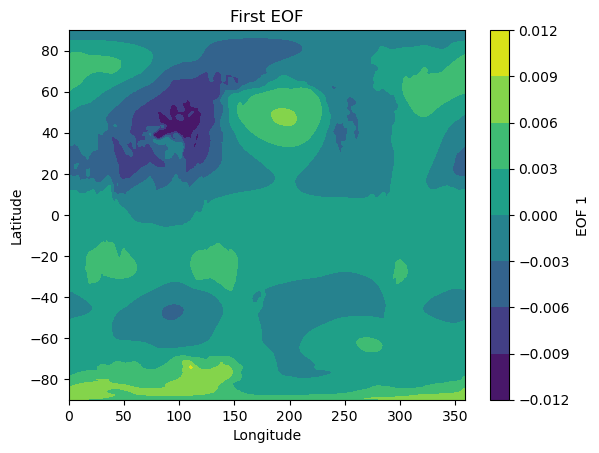

Explained Variance (first 5 EOFs): [0.31051278 0.15900818 0.13763571 0.03399296 0.03045103]


In [108]:
# Plot the first EOF
plt.figure()
plt.contourf(msl_data['longitude'], msl_data['latitude'], eofs[0].reshape(msl_data.shape[1:]))
plt.colorbar(label='EOF 1')
plt.title('First EOF')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Print explained variance
print("Explained Variance (first 5 EOFs):", variance)

In [114]:
# Subset the region
subset_msl_data = msl_ds.sel(latitude=slice(30, -30), longitude=slice(100, 290))

In [117]:
# Create bi-monthly seasons
def create_bimonthly_seasons(data):
    return data.rolling(time=2, center=True).mean().dropna(dim='time')

bimonthly_msl_data = create_bimonthly_seasons(subset_msl_data)

In [123]:
bimonthly_msl_data

<xarray.Dataset>
Dimensions:    (longitude: 253, time: 458, latitude: 81)
Coordinates:
  * longitude  (longitude) float32 100.5 101.2 102.0 102.8 ... 288.0 288.8 289.5
  * time       (time) datetime64[ns] 1979-02-01 1979-03-01 ... 2017-03-01
  * latitude   (latitude) float32 30.0 29.25 28.5 27.75 ... -28.5 -29.25 -30.0
Data variables:
    msl        (time, latitude, longitude) float32 1.014e+05 ... 1.015e+05

In [122]:
# Flatten spatial dimensions (lat, lon -> space) and mask missing data
# msl_data_reshaped = bimonthly_msl_data.stack(space=('latitude', 'longitude')).transpose('time', 'space')

# Reshape data if necessary (e.g., lat, lon, time -> (space, time))
msl_data_reshaped = bimonthly_msl_data.stack(space=('latitude', 'longitude'))  # Replace 'lat', 'lon' with your coordinates
msl_data_array = msl_data_reshaped.values  # Convert to a NumPy array

# Handle missing data (if necessary)
# msl_data_masked = np.ma.masked_invalid(msl_data_array)

# Initialize EOF solver
solver = Eof(msl_data_array)

AttributeError: 'function' object has no attribute 'ndim'

480


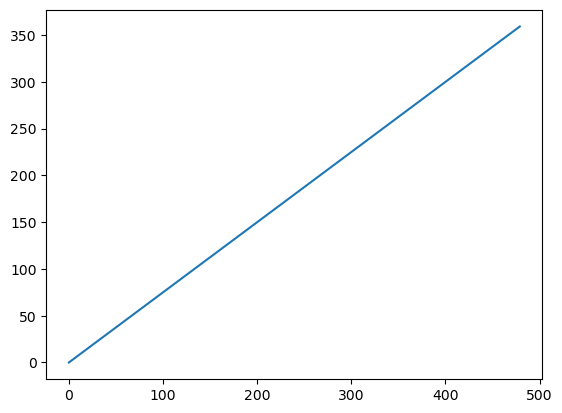

In [59]:
print(len(msl_coords["longitude"]))
plt.plot(msl_coords["longitude"])